# Assignment 3

**Name: Hamza Raqeeb**

**Id: 21031287**

In [1]:
import numpy as np # linear algebra
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
# Setting font size
font = {'family' : 'Tahoma',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

In [3]:
df = pd.read_csv("C:/Users/abc/Downloads/session 6/student_data.csv")  #Reading dataset

# Data summary

Student Performance Data was obtained in a survey of students' math course in secondary school.
It consists of 33 Column like
gender, age, size of family, Father education, Mother education, Occupation of Father and Mother, Family Relation, Health, and Grades

In [4]:
df.head(5) #viewing dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.info() #reviewing info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Since there is no null values in the dataset no processing is requird in the dataset, Sice the data is sufficient in size and for visualization thete is no requirement for certain colums we will be dropin them from the dataset

In [6]:
drop_columns = ['Dalc','Walc','reason','famsup','address','paid']

In [7]:
df.drop(columns=drop_columns, inplace = True)

In [8]:
df["G_avg"] = (df.G1+df.G2+df.G3)/3 #creating a column of average of various tests

describing the dataset befor using, i.e. getting the summmary for the numeric columns which can be used to find some insights

In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,G3,G_avg
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


# Standalone plots for visualization 

In [10]:
#collecting label for various school names that are used in survey
schools=[]
for values in df.school.value_counts():
    schools.append(values)
    
print(df.school.unique())

['GP' 'MS']


In [11]:
School_label = ["GP", "MS"]

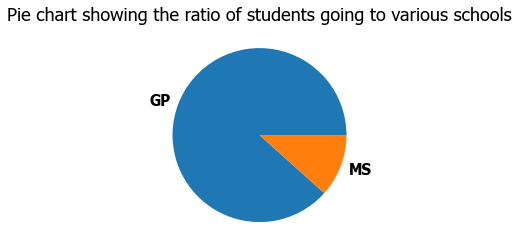

In [12]:
plot1 = plt.pie(schools,labels =School_label);
plt.title('Pie chart showing the ratio of students going to various schools');

From this visualisation it can be stated that the survey is biased towards the GP school

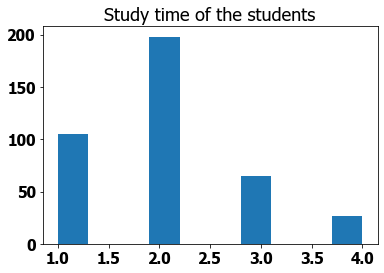

In [13]:
#ploting Avg study time of students
plot2 = plt.hist(df.studytime);
plt.title('Study time of the students');

This can be noted that 50% of students who took the survey study for around 2 hrs 

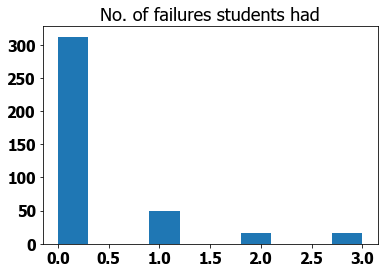

In [14]:
plot3 = plt.hist(df.failures);
plt.title("No. of failures students had");

Most of the students havent failed in the test for single time

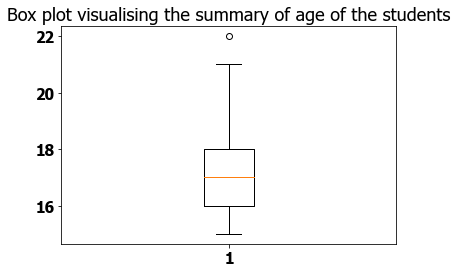

In [15]:
plot4 = plt.boxplot(df['age']);
plt.title("Box plot visualising the summary of age of the students");

Median age of students comes out to be 17 with 50% of students being between 16-18 with 25% students are 15 years old wih one oulier(oldest among all) being aged 22 yeears

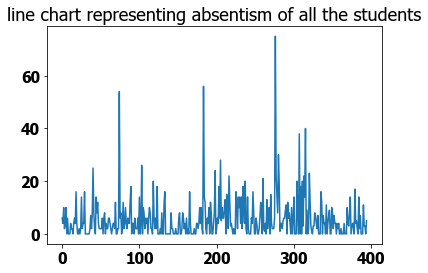

In [16]:
plot5 = plt.figure(figsize=(6,4));
plt.plot(df.absences);
plt.title("line chart representing absentism of all the students");

In the line plot, 15 or lower is the count for students leave, but in some cases its as high as 50+ leaves with 75 being the highest 

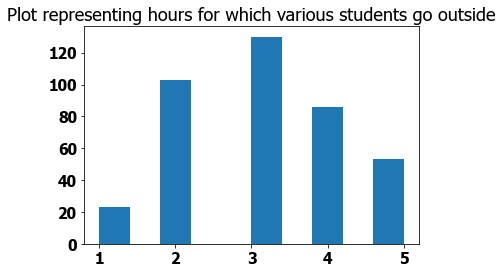

In [17]:
plot6 = plt.hist(df.goout);
plt.title("Plot representing hours for which various students go outside");

Students outing hours are visualisd ii this plot most  of the students are out for 2-3 hrs a day, with very few who prefer staying at home for whole day. 

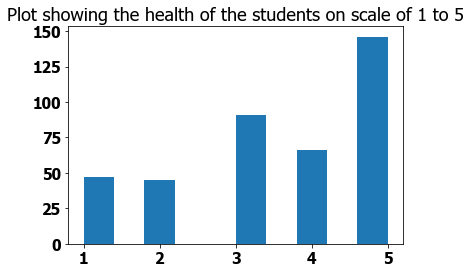

In [18]:
plot7 = plt.hist(df.health);
plt.title("Plot showing the health of the students on scale of 1 to 5");

Among the survey takers most of them can be considered as healthy as they are rated above 3.

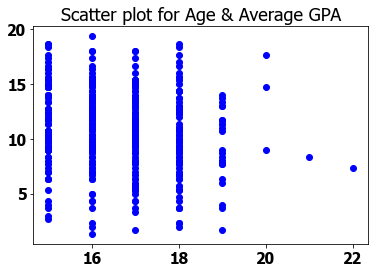

In [19]:
plot8 = plt.scatter(df.age, df.G_avg, c ="blue")
plt.title('Scatter plot for Age & Average GPA');

Survey takers are from all groups in term of the GPA when it comes to compairing it with their age.

In [20]:
print(df.Mjob.unique())
print(df.Fjob.unique())

['at_home' 'health' 'other' 'services' 'teacher']
['teacher' 'other' 'services' 'health' 'at_home']


In [21]:
labelF = ['at_home', 'health', 'other', 'services', 'teacher']
labelM = ['teacher', 'other', 'services', 'health', 'at_home']

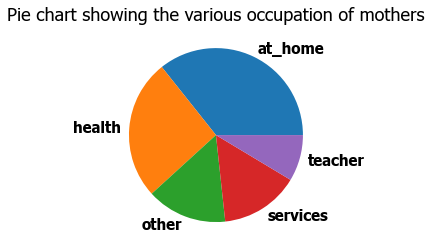

In [22]:
mother_job=[]
for values in df.Mjob.value_counts():
    mother_job.append(values)

plot9 = plt.pie(mother_job,labels =labelF);
plt.title('Pie chart showing the various occupation of mothers');

Other than being a home maker mothers also are stepping out to work with an inclinaation to work work in healthcare or service sector

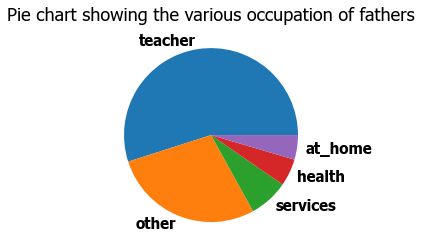

In [23]:
father_job=[]
for values in df.Fjob.value_counts():
    father_job.append(values)

plot10 = plt.pie(father_job,labels =labelM);
plt.title('Pie chart showing the various occupation of fathers');

As expected very few fathers are home maker but the inclination towards teaching among fathers is quet strong ot this maybe a biasness in the survey that lead to this plot to incline towards teaching

# Creating a gridspec visualisation of all he standalone plots

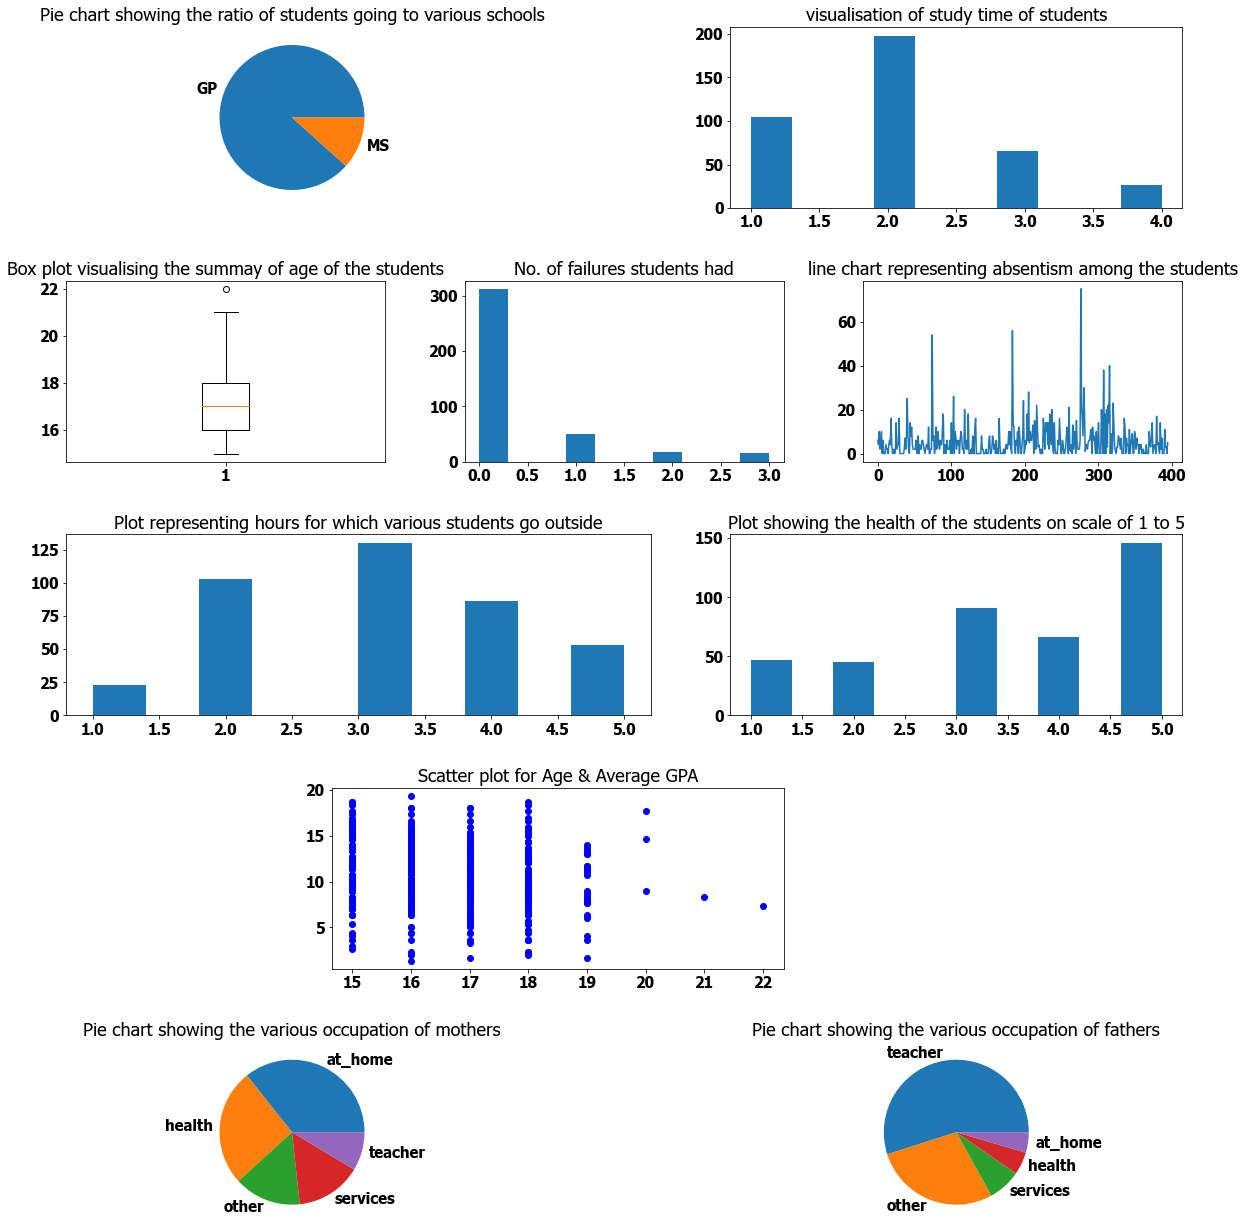

In [24]:
fig = plt.figure(figsize =([20, 22]))
 
gs = gridspec.GridSpec(5, 9)
gs.update(wspace = 1.5, hspace = 0.4)
 
ax1 = plt.subplot(gs[0, 0:4])
ax1 = plt.pie(schools,labels =School_label)
plt.title('Pie chart showing the ratio of students going to various schools');

ax2 = plt.subplot(gs[0, 5:9])
ax2 = plt.hist(df.studytime)
plt.title('visualisation of study time of students');

ax3 = plt.subplot(gs[1, 0:3])
ax3 = plt.boxplot(df['age'])
plt.title("Box plot visualising the summay of age of the students");

ax4 = plt.subplot(gs[1, 3:6])
ax4 = plt.hist(df.failures)
plt.title("No. of failures students had");

ax5 = plt.subplot(gs[1, 6:9])
ax5 = plt.plot(df.absences)
plt.title("line chart representing absentism among the students");

ax6 = plt.subplot(gs[2, 0:5])
ax6 = plt.hist(df.goout)
plt.title("Plot representing hours for which various students go outside");

ax7 = plt.subplot(gs[2, 5:10])
ax7 = plt.hist(df.health)
plt.title("Plot showing the health of the students on scale of 1 to 5");

ax8 = plt.subplot(gs[3, 2:6])
ax8 = plt.scatter(df.age, df.G_avg, c ="blue")
plt.title('Scatter plot for Age & Average GPA');

ax9 = plt.subplot(gs[4, 0:4])
ax9 = plt.pie(mother_job,labels =labelF)
plt.title('Pie chart showing the various occupation of mothers');

ax10 = plt.subplot(gs[4, 5:9])
ax10 = plt.pie(father_job,labels =labelM)
plt.title('Pie chart showing the various occupation of fathers');

plt.savefig("Grid_Students.png")

plt.show()

This plot helps us see a bigger picture of the students lifestyle who took the survey, it provides us information about their physical, educational, and even family background. This also povides us with the details about the survey and the faults which the survey condustor might have done iN regards to the sample size of the students as in many plots there is an inclination towards one or the other factor is visible.